<a href="https://colab.research.google.com/github/lamazakaria/German_to_English_Translation-/blob/main/German_to_English_Translation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'arabic-to-english-translation-sentences:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F492069%2F915247%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240831%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240831T152101Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Dcbaef7c9c59dd60ffb7eaaff178021bb63fc937bd11c02dad5723a9f760b2dacd706768d2d9803f343f94dc3da2fa1e3bcb20afbdca07f1cad1389275e686099afd08f444380685821af96d45a53d1f8956fda8ff2c211d56bcf6d326b60ccd4e5486c7d33f5a9100db3d3e696d53836604f968e66be51a7bf8eb1c10cedf776ce66133e8c220b6392ce7a9e92a21be7dbc491c4844202776de1b914772dfb224b2d7071da8c9b3e18556f98386c88256df0959c90641e868d2acf9b9c7256c1be75b435098ae7cf48835c067db8260681cf58889737df5ea9554978b5674812638f2d687a7615d106cbaa199fd866a140966b786daf787b57f8de976c58133a,german-english-neural-machine-translation-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1398268%2F2316852%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240831%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240831T152101Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D9b5a30d6a6d5fe83b808312d18a56b6bcb7a03adffea3f32e0727a3d889d2365c0a7b7b3c0fa433e61660839cdfae303994c41f2034a406950c8137af6968f70cc90bff6b08e275794a8159be69609f049577c8226dbbbf30d8f3b8be0af520ec085742c4d8774086cf9095296361647427c5eece3923ea2652ff6fafbdee1a173bba98d0c822bb9e58d58de2325f3769231847cc1a742aea168240f4154cac59a3b1a59f58a37dd9d9f2c7bdde4a9b183f7179a8ff5a2b9e62ddffddd0d40937a2176b90df16bdb12b6243b0085ac06c126eb27e3ab303a9abb56a7ffe14628aa164197e8c976bdea7997fd50249e907a6859cf80613f07289114159ad00bdb'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.data import Dataset
tf.data.experimental.enable_debug_mode()


In [ ]:
data = pd.read_csv("/kaggle/input/german-english-neural-machine-translation-dataset/GERMAN_ENGLISH_TRANSLATION.csv",delimiter=',',names=["index","English","German"])

In [ ]:
data.head(10)

,index,English,German
0,NaN,ENGLISH,GERMAN
1,0.0,hi,hallo
2,1.0,hi,gru gott
3,2.0,run,lauf
4,3.0,wow,potzdonner
5,4.0,wow,donnerwetter
6,5.0,fire,feuer
7,6.0,help,hilfe
8,7.0,help,zu hulf
9,8.0,stop,stopp


In [ ]:
data = data.dropna()

In [ ]:
data = data.drop(["index"],axis=1)

In [ ]:
data.head(10)

,English,German
1,hi,hallo
2,hi,gru gott
3,run,lauf
4,wow,potzdonner
5,wow,donnerwetter
6,fire,feuer
7,help,hilfe
8,help,zu hulf
9,stop,stopp
10,wait,warte


In [ ]:
data.info

<bound method DataFrame.info of                                                   English  \
1                                                      hi   
2                                                      hi   
3                                                     run   
4                                                     wow   
5                                                     wow   
...                                                   ...   
152816  death is something that were often discouraged...   
152817  at a moment when our economy is growing our bu...   
152818  if someone who doesnt know your background say...   
152819  if someone who doesnt know your background say...   
152820  it may be impossible to get a completely error...   

                                                   German  
1                                                   hallo  
2                                                gru gott  
3                                                    la

In [ ]:
data["source"] = data["German"].apply(lambda x:'[start]'+ x +'[end]')
data["target"] = data["English"].apply(lambda x:'[start]'+ x +'[end]')
data = data.drop(["English","German"],axis=1)

In [ ]:
data.head()

,source,target
1,[start]hallo[end],[start]hi[end]
2,[start]gru gott[end],[start]hi[end]
3,[start]lauf[end],[start]run[end]
4,[start]potzdonner[end],[start]wow[end]
5,[start]donnerwetter[end],[start]wow[end]


In [ ]:
source_data = data["source"].values
target_data = data["target"].values

In [ ]:
print(len(source_data),len(target_data))

152820 152820


In [ ]:
from tensorflow.keras.layers import TextVectorization

In [ ]:
max_tokens = 50000
max_sentence_length = 30

In [ ]:
source_vectorization = TextVectorization(
     max_tokens= max_tokens,
     output_mode="int",
     output_sequence_length = max_sentence_length,
     standardize = None
    )

target_vectorization = TextVectorization(
    max_tokens= max_tokens,
    output_mode="int",
    output_sequence_length = max_sentence_length + 1,
    standardize = None
    )

In [ ]:
target_vectorization.adapt(target_data)
source_vectorization.adapt(source_data)

In [ ]:
print(source_vectorization.get_vocabulary()[:5])

['', '[UNK]', '[start]ich', '[start]tom', 'nicht']


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
source_train, source_test, target_train, target_test = train_test_split(source_data,target_data,test_size=0.2,shuffle=True,random_state=42)
source_train, source_valid, target_train, target_valid = train_test_split(source_train, target_train,test_size=0.3,shuffle=True,random_state=42)

In [ ]:
print(source_train.shape)

(85579,)


In [ ]:
batch_size = 32
epochs = 50

In [ ]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
punctuations_list = list(string.punctuation)
punctuations_list.remove('[')
punctuations_list.remove(']')
modified_punctuation = ''.join(punctuations_list)
arabic_punctuations = '''`÷×؛<>_()*&^%ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
modified_punctuation += arabic_punctuations
print(modified_punctuation)


!"#$%&'()*+,-./:;<=>?@\^_`{|}~`÷×؛<>_()*&^%ـ،/:"؟.,'{}~¦+|!”…“–ـ


In [ ]:
def preprocessing_text(data):
#     tf.print("data (before decode):", data)

    data = data.item()
    data = data.decode()

    data = data.translate(str.maketrans('','',modified_punctuation)).strip().lower()
#     tf.print("data (after preprocessing):", data)
#     data = tf.convert_to_tensor(data)
    return tf.cast(data,tf.string)


In [ ]:
data = np.array(b" Example! string ")
preprocessing_text(data)


<tf.Tensor: shape=(), dtype=string, numpy=b'example string'>

In [ ]:
def vectorization(x_data,y_data):
    new_x_train = tf.numpy_function(preprocessing_text,[x_data], tf.string)
    new_y_train = tf.numpy_function(preprocessing_text,[y_data], tf.string)
      # Ensure shapes are set
    new_x_train.set_shape(())
    new_y_train.set_shape(())
    x_train = source_vectorization(new_x_train)
    y_train = target_vectorization(new_y_train)
    return ({"source":x_train,
           "target":y_train[:-1]},
           y_train[1:])


In [ ]:
def prepare_data(x_data,y_data):
    dataset = Dataset.from_tensor_slices((x_data,y_data))
    dataset = dataset.map(vectorization)
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(16).cache()
    return dataset

In [ ]:
print(source_train.shape)

(85579,)


In [ ]:

train_dataset = prepare_data(source_train,target_train)
test_dataset = prepare_data(source_test,target_test)
valid_dataset = prepare_data(source_valid,target_valid)

In [ ]:
for batch in train_dataset.take(1):
    print("Encoder Inputs:", batch[0]["source"].shape)
    print("Decoder Inputs:", batch[0]["target"].shape)
    print("Decoder Outputs:", batch[1].shape)


Encoder Inputs: (32, 30)
Decoder Inputs: (32, 30)
Decoder Outputs: (32, 30)


In [ ]:
import tensorflow as tf
from tensorflow.keras import Model, Input, Sequential
from tensorflow.keras.layers import Dense,Dropout, LayerNormalization, Add, Embedding, MultiHeadAttention, BatchNormalization
from keras_nlp.layers import PositionEmbedding
import keras.layers

In [ ]:
class PositionalEmbedding(keras.layers.Layer):
    def __init__(self,max_tokens,embedd_dim,sequence_length,**kwargs):
        super().__init__()
        self.embedding_layer = Embedding(input_dim=max_tokens,output_dim=embedd_dim)
        self.postional_embedding  = PositionEmbedding(sequence_length=sequence_length)

    def call(self,x):
        output_embedding = self.embedding_layer(x)
        output_postional_embedding = self.postional_embedding(output_embedding)
        return output_embedding + output_postional_embedding

In [ ]:
class TransformerEncoder(keras.layers.Layer):
    def __init__(self,no_of_heads,embedd_dim,no_of_neurons,**kwargs):
        super().__init__()
        if embedd_dim%no_of_heads != 0:
            raise ValueError(
                f"dimension of the embedding space = {embed_dim} should be divisible by number of heads = {h}"
            )
        self.key_dim = embedd_dim // no_of_heads
        self.global_self_attention = MultiHeadAttention(num_heads=no_of_heads,key_dim=self.key_dim)
        self.add = Add()
        self.layer_normalization_1 = LayerNormalization()
        self.layer_normalization_2 = LayerNormalization()
        self.feed_forward = Sequential([
            Dense(no_of_neurons,activation='relu'),
            Dropout(0.2),
            Dense(embedd_dim,activation='relu')
        ])

    def call(self,x):
        attention =  self.global_self_attention(key=x,query=x,value=x)
        layer_norm1 = self.layer_normalization_1(self.add([x,attention]))
        dense_layers = self.feed_forward(layer_norm1)
        layer_norm2 = self.layer_normalization_2(self.add([layer_norm1,dense_layers]))
        return layer_norm2


In [ ]:
class TransformerDecoder(keras.layers.Layer):
    def __init__(self,no_of_heads,embedd_dim,no_of_neurons,**kwargs):
        super().__init__()
        if embedd_dim%no_of_heads!= 0:
            raise ValueError(
                f"dimension of the embedding space = {embed_dim} should be divisible by number of heads = {h}"
            )
        self.key_dim = embedd_dim // no_of_heads
        self.casual_self_attention = MultiHeadAttention(num_heads=no_of_heads,key_dim=self.key_dim)
        self.cross_self_attention = MultiHeadAttention(num_heads=no_of_heads,key_dim=self.key_dim)
        self.add = Add()
        self.layer_normalization_1 = LayerNormalization()
        self.layer_normalization_2 = LayerNormalization()
        self.layer_normalization_3 = LayerNormalization()
        self.feed_forward = Sequential([
            Dense(no_of_neurons,activation='relu'),
            Dropout(0.2),
            Dense(embedd_dim,activation='relu')
        ])

    def call(self,x,encoder_outputs):
        casual_attention = self.casual_self_attention(key=x,query=x,value=x,use_causal_mask=True)
        layer_norm1 = self.layer_normalization_1(self.add([x,casual_attention]))
        cross_attention = self.cross_self_attention(key=encoder_outputs,query=layer_norm1,value=encoder_outputs)
        layer_norm2 = self.layer_normalization_2(self.add([layer_norm1,cross_attention]))
        dense_layers = self.feed_forward(layer_norm2)
        layer_norm3 = self.layer_normalization_3(self.add([layer_norm2,dense_layers]))
        return layer_norm3



In [ ]:
class Transformer(keras.layers.Layer):
    def __init__(self,no_of_heads,embedd_dim,no_of_neurons,max_tokens,sequence_length,**kwargs):
        super().__init__()
        self.embedding_layer_encoder = PositionalEmbedding(max_tokens,embedd_dim,sequence_length)
        self.embedding_layer_decoder = PositionalEmbedding(max_tokens,embedd_dim,sequence_length)
        self.transformer_encoder = TransformerEncoder(no_of_heads,embedd_dim,no_of_neurons)
        self.transformer_encoder_2 = TransformerEncoder(no_of_heads,embedd_dim,no_of_neurons)
        self.transformer_encoder_3 = TransformerEncoder(no_of_heads,embedd_dim,no_of_neurons)

        self.transformer_decoder = TransformerDecoder(no_of_heads,embedd_dim,no_of_neurons)
        self.dense_layer = Dense(max_tokens,activation="softmax")
        self.drop_out = Dropout(0.5)

    def call(self,encoder_inputs,decoder_inputs):
        ## Encoder
        embedding_layer_encoder=self.embedding_layer_encoder(encoder_inputs)
        encoder_outputs = self.transformer_encoder(embedding_layer_encoder)
        encoder_outputs_2 = self.transformer_encoder_2(encoder_outputs)
#         encoder_outputs_3 = self.transformer_encoder_3(encoder_outputs_2)

        ## Decoder

        embedding_layer_decoder = self.embedding_layer_decoder(decoder_inputs)
        decoder_outputs = self.transformer_decoder(embedding_layer_decoder,encoder_outputs_2)
        drop_out = self.drop_out(decoder_outputs)
        last_layer = self.dense_layer(drop_out)
        return last_layer




In [ ]:
embed_dim = 512 # dimension of the embedding space
dense_dim = 2048 # dimension of the feed forward network (a rule of thumb is to use 4 times the size of the embeddings)
num_heads = 8



In [ ]:
transformer = Transformer(no_of_heads=num_heads,embedd_dim=embed_dim,no_of_neurons=dense_dim
                          ,max_tokens=max_tokens,sequence_length=max_sentence_length)

In [ ]:
encoder_inputs = Input(shape=(None,), dtype="int64",name="source")
decoder_inputs = Input(shape=(None,), dtype="int64",name="target")
decoder_outputs = transformer(encoder_inputs,decoder_inputs)
model_transformer = Model([encoder_inputs,decoder_inputs],decoder_outputs)
model_transformer.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/layer.py:361: UserWarning: `build()` was called on layer 'transformer', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ source (InputLayer) │ (None, None)      │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ target (InputLayer) │ (None, None)      │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ transformer         │ (None, None,      │ 87,389,520 │ source[0][0],     │
│ (Transformer)       │ 50000)            │            │ target[0][0]      │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 87,389,520 (333.36 MB)

 Trainable params: 87,389,520 (333.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam,RMSprop


In [ ]:
LR = 1e-3
model_transformer.compile(optimizer=RMSprop(LR),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
callbacks = [ReduceLROnPlateau(monitor="val_loss",patience=5,factor=0.1),
             EarlyStopping(monitor='val_loss',patience=6)
            ]




In [ ]:
model_history = model_transformer.fit(train_dataset,batch_size=batch_size,epochs=epochs,validation_data=valid_dataset,callbacks=callbacks)

Epoch 1/50


I0000 00:00:1725104130.085031     149 service.cc:145] XLA service 0x7e9dc4002f70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725104130.085088     149 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
W0000 00:00:1725104130.499319     149 assert_op.cc:38] Ignoring Assert operator compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert


   1/2675 ━━━━━━━━━━━━━━━━━━━━ 14:08:51 19s/step - accuracy: 0.0000e+00 - loss: 10.8015

I0000 00:00:1725104142.286933     149 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2674/2675 ━━━━━━━━━━━━━━━━━━━━ 0s 660ms/step - accuracy: 0.8371 - loss: 1.3172

W0000 00:00:1725105906.109579     150 assert_op.cc:38] Ignoring Assert operator compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert


2675/2675 ━━━━━━━━━━━━━━━━━━━━ 0s 663ms/step - accuracy: 0.8371 - loss: 1.3171

W0000 00:00:1725105917.793928     150 assert_op.cc:38] Ignoring Assert operator compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert
W0000 00:00:1725106630.773686     150 assert_op.cc:38] Ignoring Assert operator compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert


2675/2675 ━━━━━━━━━━━━━━━━━━━━ 2509s 931ms/step - accuracy: 0.8371 - loss: 1.3170 - val_accuracy: 0.8837 - val_loss: 0.8126 - learning_rate: 0.0010
Epoch 2/50
2675/2675 ━━━━━━━━━━━━━━━━━━━━ 155s 58ms/step - accuracy: 0.8877 - loss: 0.7796 - val_accuracy: 0.9028 - val_loss: 0.6671 - learning_rate: 0.0010
Epoch 3/50
2675/2675 ━━━━━━━━━━━━━━━━━━━━ 154s 57ms/step - accuracy: 0.9043 - loss: 0.6340 - val_accuracy: 0.9106 - val_loss: 0.6106 - learning_rate: 0.0010
Epoch 4/50
2675/2675 ━━━━━━━━━━━━━━━━━━━━ 152s 57ms/step - accuracy: 0.9144 - loss: 0.5464 - val_accuracy: 0.9146 - val_loss: 0.5865 - learning_rate: 0.0010
Epoch 5/50
2675/2675 ━━━━━━━━━━━━━━━━━━━━ 148s 55ms/step - accuracy: 0.9220 - loss: 0.4849 - val_accuracy: 0.9173 - val_loss: 0.5776 - learning_rate: 0.0010
Epoch 6/50
2675/2675 ━━━━━━━━━━━━━━━━━━━━ 144s 54ms/step - accuracy: 0.9283 - loss: 0.4364 - val_accuracy: 0.9202 - val_loss: 0.5637 - learning_rate: 0.0010
Epoch 7/50
2675/2675 ━━━━━━━━━━━━━━━━━━━━ 144s 54ms/step - accuracy

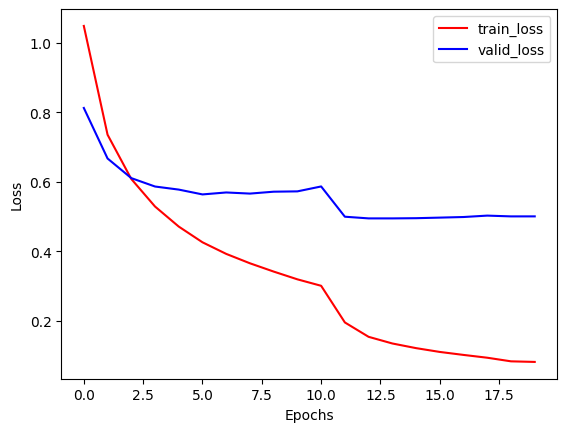

In [ ]:
import matplotlib.pyplot as plt
loss = model_history.history['loss']
valid_loss = model_history.history['val_loss']
plt.plot(loss,color='r',label='train_loss')
plt.plot(valid_loss,color='b',label='valid_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
def preprocessing_text_2(data):
#     tf.print("data (before decode):", data)

#     data = data.item()
#     data = data.decode()

    data = data.translate(str.maketrans('','',modified_punctuation)).strip().lower()
#     tf.print("data (after preprocessing):", data)
#     data = tf.convert_to_tensor(data)
    return tf.cast(data,tf.string)

In [ ]:
vocabulary = target_vectorization.get_vocabulary()
target_dic = dict(zip(range(len(vocabulary)),vocabulary))
max_seq_length = 30

def decoded_sentence(sentence):
    modified_sentence = preprocessing_text_2(sentence)
    input_source = source_vectorization([modified_sentence])
#     print(f"input_source:{input_source}")
    decoded_word = '[start]'
    for idx in range(max_seq_length):
        vectorized_word = target_vectorization([decoded_word])[:,:-1]
        predications = model_transformer([input_source,vectorized_word])
        target_idx = np.argmax(predications[0,idx,:])
        predicated_word = target_dic[target_idx]
        decoded_word += " "+ predicated_word
        if predicated_word == '[end]':
            break

    return decoded_word


In [ ]:
for i in np.random.randint(0,len(source_test),50):
    input_sent = source_test[i]
    predicated = decoded_sentence(input_sent)
    actual = target_test[i]
    print(f"input:{input_sent}")
    print(f"predicated:{predicated}")
    print(f"Actual_output:{actual}")
    print()


input:[start]vielleicht sollten wir uns morgen noch einmal unterhalten[end]
predicated:[start] may be talking to us again[end]                        
Actual_output:[start]maybe we should talk again tomorrow[end]

input:[start]ich werde im portside hotel ubernachten[end]
predicated:[start] me to stay at the hotel for the hotel[end]                     
Actual_output:[start]ill be staying at the portside hotel[end]

input:[start]tom will junger aussehen[end]
predicated:[start] look younger[end]                            
Actual_output:[start]tom wants to look younger[end]

input:[start]dieses medikament wird ihre erkaltung heilen[end]
predicated:[start] medicine will cure your cold[end]                         
Actual_output:[start]this medicine will cure your cold[end]

input:[start]sei netter zu deinem bruder[end]
predicated:[start] are a nice to your brother[end]                        
Actual_output:[start]be nicer to your brother[end]

input:[start]ich lasse meinen regenschirm imm